In [7]:
from kan import *
import torch as tr

In [15]:
model = KAN(width=[2,5,1], grid=5, k=3)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: tr.exp(tr.sin(tr.pi * x[:,[0]]) + x[:,[1]]**2)

In [35]:
dataset

{'train_input': tensor([[-0.0075,  0.5547],
         [ 0.5364,  0.1791],
         [-0.8230,  0.1526],
         ...,
         [-0.3216, -0.4567],
         [ 0.0036, -0.3966],
         [-0.1923, -0.8376]]),
 'test_input': tensor([[-0.0850, -0.2418],
         [-0.7799, -0.0967],
         [-0.0061, -0.4609],
         ...,
         [ 0.0392, -0.2945],
         [-0.3037, -0.0922],
         [ 0.7534,  0.8848]]),
 'train_label': tensor([[1.3287],
         [2.7886],
         [0.6038],
         [0.6248],
         [0.5784],
         [2.4956],
         [0.9510],
         [2.2221],
         [0.9604],
         [5.0185],
         [0.7090],
         [0.6934],
         [1.4567],
         [0.4631],
         [0.6223],
         [1.1396],
         [2.6025],
         [3.8784],
         [0.7173],
         [0.5919],
         [5.1320],
         [2.4276],
         [0.5478],
         [2.5004],
         [0.6470],
         [1.3875],
         [2.6785],
         [0.9634],
         [0.4302],
         [0.7583],
      

In [18]:
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

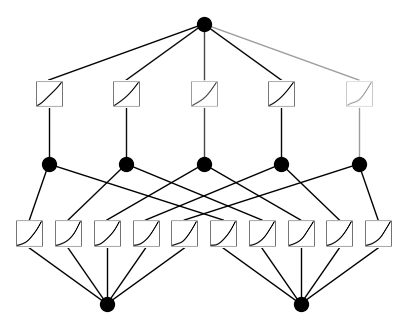

In [21]:
model(dataset['train_input'])
model.plot(beta=100)

In [23]:
model.train(dataset, opt='LBFGS', steps=20, lamb=0.01, lamb_entropy=10)

train loss: 6.96e-02 | test loss: 7.07e-02 | reg: 1.63e+01 : 100%|██| 20/20 [00:08<00:00,  2.31it/s]


{'train_loss': [array(0.24566305, dtype=float32),
  array(0.24427596, dtype=float32),
  array(0.11288764, dtype=float32),
  array(0.09423835, dtype=float32),
  array(0.08964664, dtype=float32),
  array(0.15027474, dtype=float32),
  array(0.1309332, dtype=float32),
  array(0.099312, dtype=float32),
  array(0.08304153, dtype=float32),
  array(0.09410547, dtype=float32),
  array(0.10290921, dtype=float32),
  array(0.07556941, dtype=float32),
  array(0.07167499, dtype=float32),
  array(0.07616301, dtype=float32),
  array(0.07378759, dtype=float32),
  array(0.07096451, dtype=float32),
  array(0.07017487, dtype=float32),
  array(0.07035129, dtype=float32),
  array(0.07075682, dtype=float32),
  array(0.06961574, dtype=float32)],
 'test_loss': [array(0.24784146, dtype=float32),
  array(0.25828853, dtype=float32),
  array(0.11467474, dtype=float32),
  array(0.09605642, dtype=float32),
  array(0.09373118, dtype=float32),
  array(0.15402904, dtype=float32),
  array(0.13510513, dtype=float32),
  a

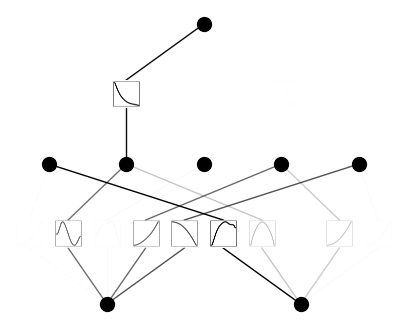

In [24]:
model.plot()

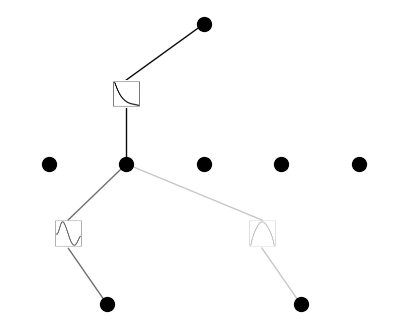

In [25]:
model.prune()
model.plot(mask=True)

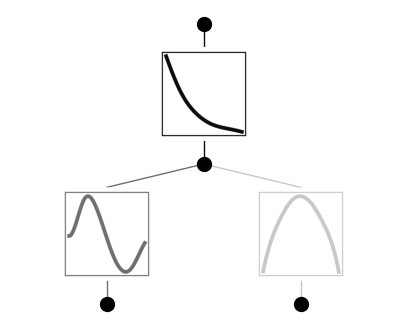

In [26]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [27]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 7.36e-03 | test loss: 7.30e-03 | reg: 2.58e+00 : 100%|██| 50/50 [00:06<00:00,  7.77it/s]


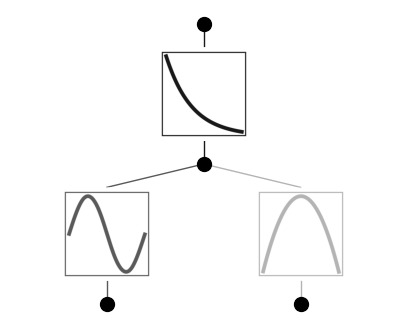

In [28]:
model.plot()

In [30]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999728202819824
fixing (0,1,0) with x^2, r2=0.9999991655349731
fixing (1,0,0) with exp, r2=0.9999991059303284


In [31]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 2.05e-03 | test loss: 1.99e-03 | reg: 2.58e+00 : 100%|██| 50/50 [00:02<00:00, 20.88it/s]


In [32]:
model.symbolic_formula()[0][0]

0.99*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1)) + 0.01